In [1]:
import pandas as pd         # data manipulation & analysis
import numpy as np          # numerical & mathematical operations
import matplotlib.pyplot as plt         # for creating visualisations
import seaborn as  sns          # for more advanced visualisations 

In [2]:
df = pd.read_csv('Netflix_Userbase.csv') 

In [4]:
df.shape

(2500, 10)

In [6]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [44]:
df.describe()

,User ID,Monthly Revenue,Join Date,Last Payment Date,Age
count,2500.00000,2500.000000,2500,2500,2500.000000
mean,1250.50000,12.508400,2022-07-30 08:06:43.200000,2023-06-21 10:33:36,38.795600
min,1.00000,10.000000,2021-05-09 00:00:00,2023-01-07 00:00:00,26.000000
25%,625.75000,11.000000,2022-06-15 00:00:00,2023-05-07 00:00:00,32.000000
50%,1250.50000,12.000000,2022-08-07 00:00:00,2023-06-28 00:00:00,39.000000
75%,1875.25000,14.000000,2022-10-09 00:00:00,2023-08-07 00:00:00,45.000000
max,2500.00000,15.000000,2023-12-01 00:00:00,2023-12-07 00:00:00,51.000000
std,721.83216,1.686851,NaN,NaN,7.171778


In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


#### Convert the Join Date and Last Payment Date to DateTime format

In [21]:
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

C:\Users\julia\AppData\Local\Temp\ipykernel_20424\602469439.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Join Date'] = pd.to_datetime(df['Join Date'])
C:\Users\julia\AppData\Local\Temp\ipykernel_20424\602469439.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])


In [22]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


#### What subscription types are there?

In [42]:
sub_types = df['Subscription Type'].unique()
sub_types

array(['Basic', 'Premium', 'Standard'], dtype=object)

#### Is it a monthly subscription? Or yearly?

In [43]:
duration = df['Plan Duration'].unique()
duration

array(['1 Month'], dtype=object)

#### What are the different prices of the subscriptions?

In [33]:
subscription_prices = df.groupby('Subscription Type')['Monthly Revenue'].unique().reset_index()
print(subscription_prices)

  Subscription Type           Monthly Revenue
0             Basic  [10, 13, 12, 11, 15, 14]
1           Premium  [15, 13, 10, 11, 12, 14]
2          Standard  [12, 15, 13, 11, 14, 10]


In [49]:
group = df.groupby(['Subscription Type','Monthly Revenue'])
group.first(['Subscription Type','Monthly Revenue'])

User ID  Age
Subscription Type Monthly Revenue              
Basic             10                     1   28
                  11                    86   29
                  12                    80   43
                  13                    75   28
                  14                    92   39
                  15                    89   39
Premium           10                    81   37
                  11                    91   39
                  12                    94   44
                  13                    74   41
                  14                    96   32
                  15                     2   35
Standard          10                   159   51
                  11                   119   44
                  12                     3   42
                  13                    90   49
                  14                   143   30
                  15                    78   49

#### Visualise Sales per Month

In [3]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


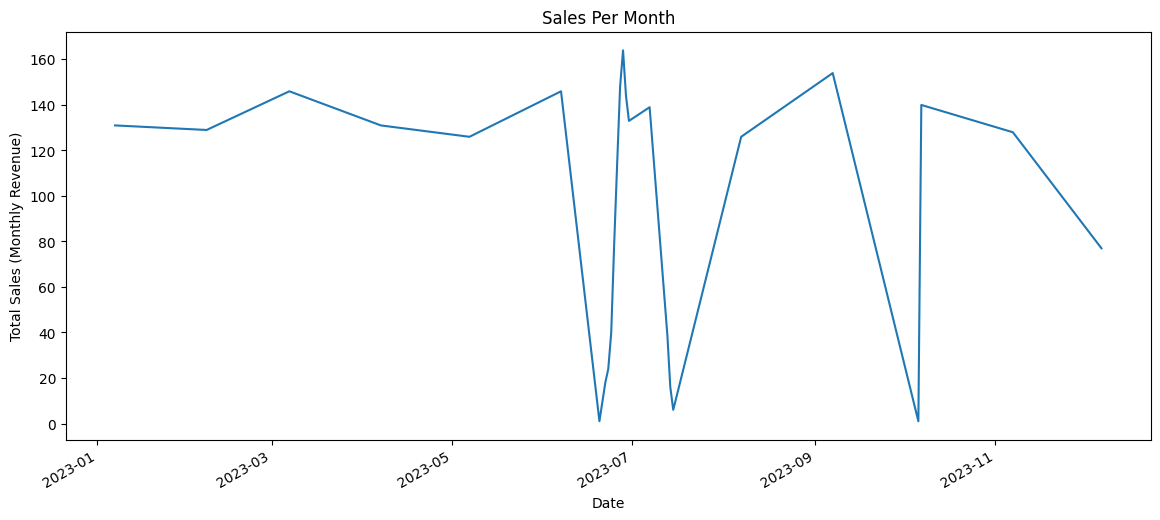

In [30]:
df['Last Payment Date'].value_counts().sort_index().plot(kind='line', title='Sales Per Month')
plt.rcParams['figure.figsize'] = (14, 6)
plt.xlabel('Date')
plt.ylabel('Total Sales (Monthly Revenue)')
plt.show()

#### Most Popular Subscription Type

#### Gender vs Subscription Type 

#### Number of Users vs Country